# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv(R'data\nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [3]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [4]:
df.corr()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


<AxesSubplot:>

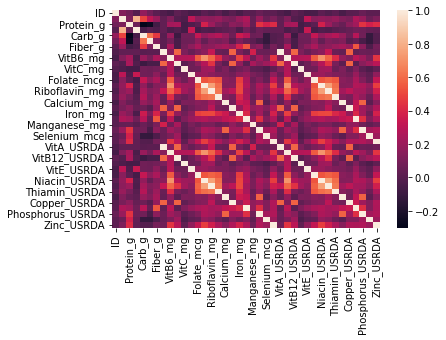

In [5]:
sns.heatmap(df.corr())

In [6]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df.mean(axis=0)

----------------------
Media de cada variable
----------------------


ID                  15467.757368
Energy_kcal           226.438617
Protein_g              11.523910
Fat_g                  10.647024
Carb_g                 21.819062
Sugar_g                 6.560253
Fiber_g                 2.023242
VitA_mcg               93.968786
VitB6_mg                0.264369
VitB12_mcg              1.225260
VitC_mg                 7.925377
VitE_mg                 0.872329
Folate_mcg             50.306104
Niacin_mg               3.411560
Riboflavin_mg           0.237248
Thiamin_mg              0.209857
Calcium_mg             73.411348
Copper_mcg              0.172181
Iron_mg                 2.696771
Magnesium_mg           32.745301
Manganese_mg            0.504439
Phosphorus_mg         155.986308
Selenium_mcg           12.614945
Zinc_mg                 1.970216
VitA_USRDA              0.104410
VitB6_USRDA             0.155511
VitB12_USRDA            0.510525
VitC_USRDA              0.088060
VitE_USRDA              0.058155
Folate_USRDA            0.125765
Niacin_USR

In [7]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


ID                  8.503475e+07
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USRDA        2.175305e-01
Niacin_USR

In [8]:
df = df.drop(['VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],axis=1)

<AxesSubplot:>

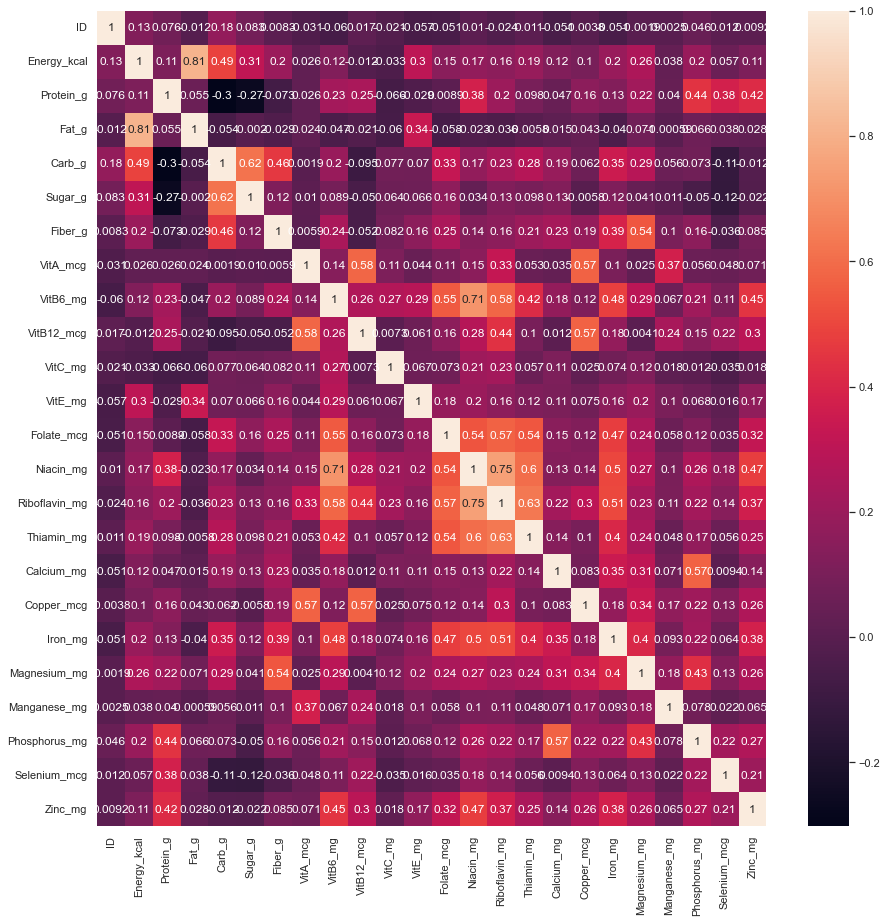

In [9]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(df.corr(),annot=True)

### Variables no numércias
Elimina las variables de texto del dataset

In [10]:
num = [col for col in df.columns if df[col].dtype in ['int64','float64']]
df_num = df[num]
df_num

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [11]:
df_num = (df_num +1)
df_num.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15468.757368,227.438617,12.52391,11.647024,22.819062,7.560253,3.023242,94.968786,1.264369,2.225260,...,1.237248,1.209857,74.411348,1.172181,3.696771,33.745301,1.504439,156.986308,13.614945,2.970216
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.449880,0.518369,201.363662,0.553052,5.726967,56.068454,6.383438,203.093234,28.292347,3.358213
min,1002.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8696.250000,94.000000,3.47000,1.992500,1.040000,1.000000,1.000000,1.000000,1.034250,1.000000,...,1.046000,1.030000,10.000000,1.030000,1.530000,11.000000,1.000000,38.000000,1.100000,1.230000
50%,14274.000000,192.000000,9.28500,6.235000,9.945000,1.370000,1.300000,2.500000,1.120000,1.080000,...,1.150000,1.077500,20.000000,1.079000,2.330000,21.000000,1.022000,134.000000,4.900000,1.845000
75%,20051.750000,337.000000,20.97750,14.900000,33.900000,6.300000,3.400000,22.000000,1.355000,2.297500,...,1.260000,1.223000,63.000000,1.144750,3.580000,30.000000,1.222000,217.000000,22.300000,3.700000
max,93601.000000,903.000000,89.32000,101.000000,101.000000,100.800000,80.000000,30001.000000,13.000000,99.890000,...,18.500000,24.375000,7365.000000,16.050000,124.600000,782.000000,329.000000,9919.000000,1918.000000,91.950000


In [12]:
df_log = np.log(df_num)


In [13]:
df_log

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.909753,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,...,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1,6.910751,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,...,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
2,6.911747,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,...,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
3,6.912743,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,...,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
4,6.913737,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,...,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,11.327932,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,...,0.173953,0.019803,4.204693,0.095310,0.875469,4.110874,0.000000,5.541264,4.309456,0.741937
8614,11.410239,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,...,0.023717,0.011929,2.397895,0.032467,0.457425,3.637586,0.028587,6.056784,3.122365,0.936093
8615,11.412895,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,...,0.058269,0.122218,2.639057,0.019803,1.526056,2.397895,0.000000,2.197225,0.530628,0.173953
8616,11.413779,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,...,0.113329,0.009950,2.397895,0.336472,1.504077,5.525453,0.000000,5.609472,3.346389,0.693147


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [14]:
scaler = StandardScaler()
df_sca = scaler.fit_transform(df_log)
df_sca
new_df = pd.DataFrame(df_sca,columns=num)
new_df

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-3.480717,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,-3.479343,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,-3.477969,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,-3.476598,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,-3.475227,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.607443,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,...,-0.036792,-0.615898,0.697647,-0.154219,-0.089688,1.007399,-0.478294,0.744270,1.820639,-0.083621
8614,2.720860,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,...,-0.730492,-0.651350,-0.501286,-0.464127,-0.676585,0.641150,-0.403646,1.044265,0.992959,0.195555
8615,2.724520,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,...,-0.570950,-0.154777,-0.341258,-0.526581,0.823681,-0.318175,-0.478294,-1.201721,-0.814088,-0.900321
8616,2.725737,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,...,-0.316719,-0.660257,-0.501286,1.035060,0.792824,2.102060,-0.478294,0.783962,1.149156,-0.153776


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [15]:
pca_pipe = PCA(n_components=new_df.shape[1])
pca_pipe.fit(new_df)

modelo_pca = pca_pipe

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [16]:
pd.DataFrame(modelo_pca.components_
,columns=num)

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,0.032367,0.198584,0.278323,0.148299,0.003324,-0.026548,0.074750,0.078557,0.262927,0.215070,...,0.266061,0.229306,0.153499,0.188096,0.281934,0.275511,0.138883,0.295566,0.247231,0.298881
1,-0.028502,0.004060,-0.242437,-0.150696,0.437320,0.319496,0.386601,0.112673,0.008667,-0.235833,...,0.073950,0.160847,0.205673,0.137013,0.124194,0.113003,0.258978,-0.061244,-0.224242,-0.158838
2,-0.284692,-0.476452,-0.082978,-0.406847,-0.224346,-0.167852,-0.161450,0.339077,0.156937,0.184268,...,0.108421,-0.063104,0.116127,0.032302,-0.054483,0.056105,-0.041611,0.012571,0.070326,0.038316
3,-0.052387,0.095551,-0.131332,0.072172,0.039933,0.291156,-0.086212,0.099846,0.301743,0.225246,...,0.347922,0.300073,-0.199361,-0.271181,0.116423,-0.324726,-0.327767,-0.229912,-0.161424,-0.029412
4,-0.377853,0.244618,-0.038596,0.411002,-0.064537,0.084570,-0.154488,0.420050,-0.112635,-0.005339,...,-0.063474,-0.188170,0.206827,0.017182,-0.165263,-0.036871,-0.030623,0.021880,0.087255,-0.044379
5,0.029334,-0.057591,-0.132409,0.034228,-0.197073,-0.229103,0.052457,-0.205555,0.151147,0.061783,...,-0.035552,-0.009428,-0.437210,0.404550,0.037595,-0.095885,0.349498,-0.272505,-0.076449,0.093758
6,-0.810413,0.045332,0.033177,0.018654,-0.017405,-0.140472,0.044093,-0.261338,0.010875,-0.183045,...,0.127318,0.226129,0.002032,0.033244,0.082730,-0.060682,0.133441,-0.065804,-0.073864,0.017463
7,0.061457,0.053836,0.005538,0.053950,0.062648,0.152158,-0.157511,0.195923,-0.218948,0.317769,...,0.208215,-0.144356,0.102759,0.571578,0.170901,-0.206272,0.083472,-0.139616,-0.118501,0.083390
8,0.181150,0.016634,-0.069448,0.049936,0.057378,-0.378061,-0.093674,0.465848,-0.120424,-0.173841,...,0.167839,0.321698,-0.195441,-0.005089,-0.035953,-0.171359,0.161590,-0.080005,0.091019,-0.335913
9,0.140517,-0.051521,0.116787,0.190302,-0.157994,-0.475516,0.164311,0.119499,0.074300,-0.086482,...,-0.015996,0.089862,0.422596,-0.130858,0.206470,-0.043581,0.065051,-0.020981,-0.395488,-0.041865


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29975904 0.45957353 0.54484638 0.61307248 0.6742703  0.71728901
 0.75255374 0.78202954 0.80755488 0.83164028 0.8533061  0.87413809
 0.89224372 0.90994708 0.92366311 0.93647302 0.94877238 0.95949426
 0.96873428 0.97735118 0.98447952 0.99096246 0.99638759 1.        ]


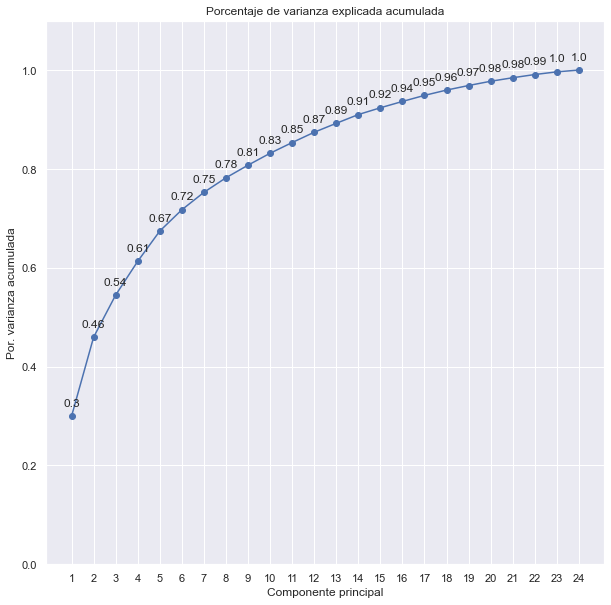

In [17]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(
    np.arange(len(new_df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(new_df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [18]:
pca_pipe2 = PCA(n_components=6)
pca_pipe2.fit(df_sca)

modelo_pca2 = pca_pipe2.transform(df_sca)

In [19]:

proyecciones = pd.DataFrame(
    modelo_pca2,
    columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6']
)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.254172,-0.864286,0.068343,0.725165,5.309663,0.277863
1,-2.221566,-0.805948,0.048056,0.716545,5.282486,0.318055
2,-3.381271,-1.038799,-0.474539,1.650224,5.350546,1.293225
3,1.409058,-1.152702,1.430844,-0.616312,3.646995,-2.150003
4,1.123787,-1.093036,1.326578,-0.858805,3.929657,-2.391576
...,...,...,...,...,...,...
8613,2.634748,-2.608909,0.029262,-0.131189,1.358303,0.168214
8614,0.164336,-1.916526,0.041445,-1.550822,-1.507253,-0.674924
8615,-2.838587,1.573107,-2.092604,1.025754,-1.747679,-0.828565
8616,1.204355,-0.849843,0.126558,-1.678198,0.347279,1.219460


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [21]:
final = pd.merge(df[['FoodGroup']], proyecciones, left_index=True,right_index=True)
final

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.254172,-0.864286,0.068343,0.725165,5.309663,0.277863
1,Dairy and Egg Products,-2.221566,-0.805948,0.048056,0.716545,5.282486,0.318055
2,Dairy and Egg Products,-3.381271,-1.038799,-0.474539,1.650224,5.350546,1.293225
3,Dairy and Egg Products,1.409058,-1.152702,1.430844,-0.616312,3.646995,-2.150003
4,Dairy and Egg Products,1.123787,-1.093036,1.326578,-0.858805,3.929657,-2.391576
...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,2.634748,-2.608909,0.029262,-0.131189,1.358303,0.168214
8614,Finfish and Shellfish Products,0.164336,-1.916526,0.041445,-1.550822,-1.507253,-0.674924
8615,Sweets,-2.838587,1.573107,-2.092604,1.025754,-1.747679,-0.828565
8616,Finfish and Shellfish Products,1.204355,-0.849843,0.126558,-1.678198,0.347279,1.219460
